# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#output File (CSV)
city_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahina
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | gulf shores
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | seydi
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | al jawf
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | kharp
Processing Record 16 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 17 of Set 1 | nadi
Processing Record 18 of Set 1 | callao
Processing Record 19 of Set 1 | wotje
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | '

Processing Record 37 of Set 4 | tual
Processing Record 38 of Set 4 | cabugao
Processing Record 39 of Set 4 | woodward
Processing Record 40 of Set 4 | madisonville
Processing Record 41 of Set 4 | panorama
Processing Record 42 of Set 4 | toliara
Processing Record 43 of Set 4 | isna
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | oranjemund
Processing Record 47 of Set 4 | el hajeb
Processing Record 48 of Set 4 | nelson
Processing Record 49 of Set 4 | beacon square
Processing Record 0 of Set 5 | chengde
Processing Record 1 of Set 5 | yazoo city
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | junction city
Processing Record 5 of Set 5 | morehead city
Processing Record 6 of Set 5 | caconda
Processing Record 7 of Set 5 | port lincoln
Processing Record 8 of Set 5 | hastings
Processing Record 9 of Set 5 | waounde
Processing Record 10 of Set 5 | thinadhoo
Processin

Processing Record 31 of Set 8 | usinsk
Processing Record 32 of Set 8 | altamira
Processing Record 33 of Set 8 | mumford
Processing Record 34 of Set 8 | nizhneangarsk
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | merizo village
Processing Record 37 of Set 8 | inirida
Processing Record 38 of Set 8 | owen sound
Processing Record 39 of Set 8 | navia
Processing Record 40 of Set 8 | onega
Processing Record 41 of Set 8 | karungdong
Processing Record 42 of Set 8 | newman
Processing Record 43 of Set 8 | balqash
Processing Record 44 of Set 8 | al burayqah
Processing Record 45 of Set 8 | san fernando
Processing Record 46 of Set 8 | rawson
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | la'ie
Processing Record 49 of Set 8 | whitehorse
Processing Record 0 of Set 9 | chegdomyn
Processing Record 1 of Set 9 | puerto deseado
Processing Record 2 of Set 9 | tazacorte
Processing Record 3 of Set 9 | ancud
Processing Record 4 of Set 9 | contamana
Pr

Processing Record 21 of Set 12 | trosa
Processing Record 22 of Set 12 | namibe
Processing Record 23 of Set 12 | marsaskala
City not found. Skipping...
Processing Record 24 of Set 12 | gilgit
Processing Record 25 of Set 12 | paso de los toros
Processing Record 26 of Set 12 | letlhakeng
Processing Record 27 of Set 12 | boden
Processing Record 28 of Set 12 | pokhvistnevo
Processing Record 29 of Set 12 | lauro de freitas
Processing Record 30 of Set 12 | kamloops
Processing Record 31 of Set 12 | isnos
Processing Record 32 of Set 12 | urangan
Processing Record 33 of Set 12 | medenine
Processing Record 34 of Set 12 | tsengel
Processing Record 35 of Set 12 | vila velha
Processing Record 36 of Set 12 | torre de moncorvo
Processing Record 37 of Set 12 | phan rang-thap cham
Processing Record 38 of Set 12 | luanco
Processing Record 39 of Set 12 | prieska
Processing Record 40 of Set 12 | brisas de zicatela
Processing Record 41 of Set 12 | amravati
Processing Record 42 of Set 12 | konarka
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mahina,-17.5065,-149.4890,303.02,62,40,2.57,PF,1683410433
1,castillos,-34.1667,-53.8333,292.35,99,100,3.59,UY,1683410433
2,gulf shores,30.2460,-87.7008,297.78,68,100,1.34,US,1683410403
3,olonkinbyen,70.9221,-8.7187,272.04,94,100,5.66,SJ,1683410434
4,port elizabeth,-33.9180,25.5701,290.31,82,0,5.66,ZA,1683410434


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,303.02,62,40,2.57,PF,1683410433
1,castillos,-34.1667,-53.8333,292.35,99,100,3.59,UY,1683410433
2,gulf shores,30.2460,-87.7008,297.78,68,100,1.34,US,1683410403
3,olonkinbyen,70.9221,-8.7187,272.04,94,100,5.66,SJ,1683410434
4,port elizabeth,-33.9180,25.5701,290.31,82,0,5.66,ZA,1683410434


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

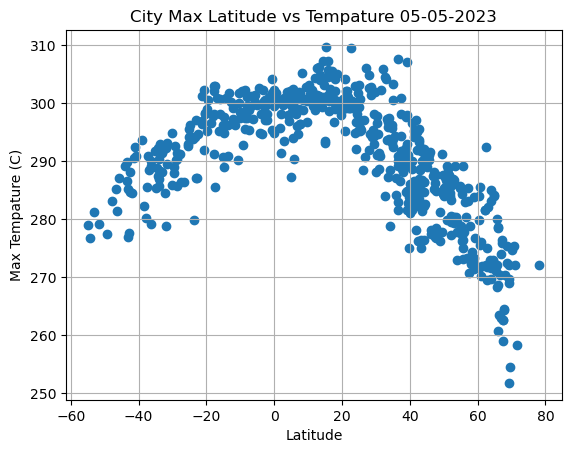

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Tempature 05-05-2023")
plt.ylabel("Max Tempature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

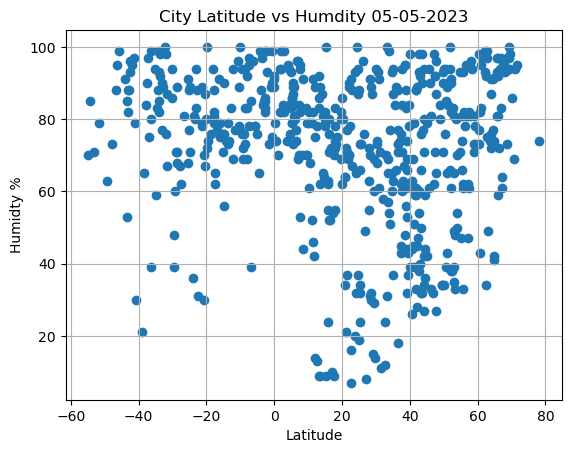

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humdity 05-05-2023")
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

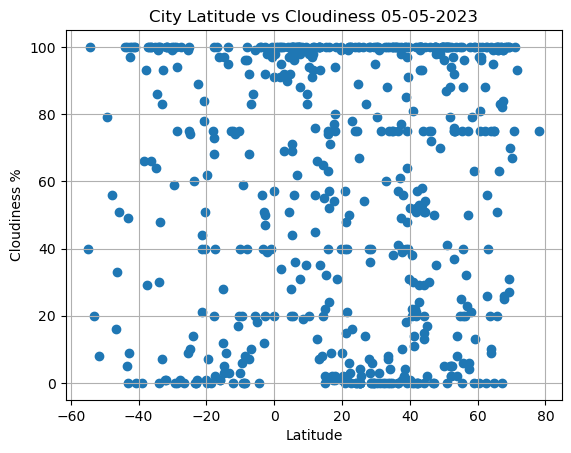

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 05-05-2023")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

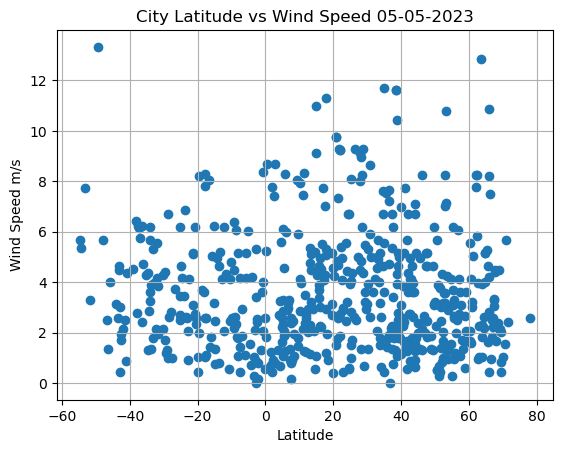

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 05-05-2023")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


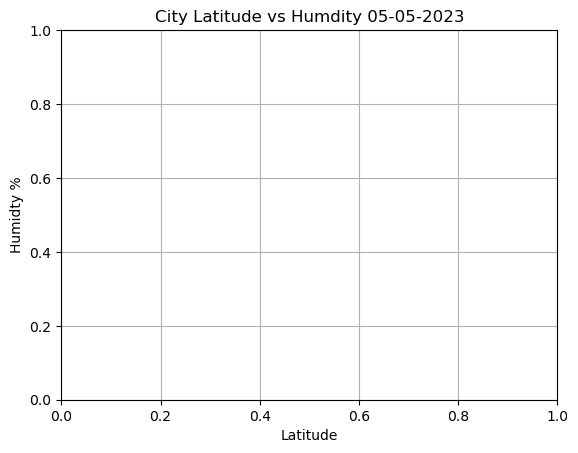

In [25]:
# Define a function to create Linear Regression plots (used the plot above with new parameters)
# Incorporate the other graph properties
plt.title("City Latitude vs Humdity 05-05-2023")
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

In [26]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gulf shores,30.2460,-87.7008,297.78,68,100,1.34,US,1683410403
3,olonkinbyen,70.9221,-8.7187,272.04,94,100,5.66,SJ,1683410434
5,seydi,39.4816,62.9137,291.02,43,91,1.16,TM,1683410434
8,albany,42.6001,-73.9662,293.59,38,29,3.79,US,1683410156
10,yellowknife,62.4560,-114.3525,292.44,34,0,8.23,CA,1683410253


In [15]:
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mahina,-17.5065,-149.4890,303.02,62,40,2.57,PF,1683410433
1,castillos,-34.1667,-53.8333,292.35,99,100,3.59,UY,1683410433
4,port elizabeth,-33.9180,25.5701,290.31,82,0,5.66,ZA,1683410434
6,edinburgh of the seven seas,-37.0676,-12.3116,288.45,75,100,5.76,SH,1683410239
7,papatowai,-46.5619,169.4708,285.16,88,16,2.49,NZ,1683410274


###  Temperature vs. Latitude Linear Regression Plot

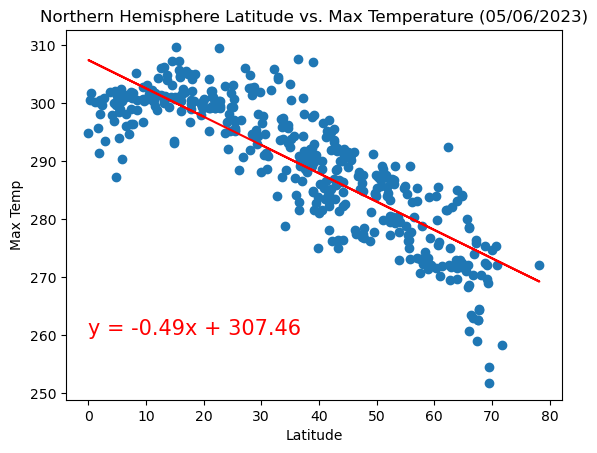

In [44]:
# Linear regression on Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Max Temp"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0, 260), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Latitude vs. Max Temperature (05/06/2023)")
plt.show()

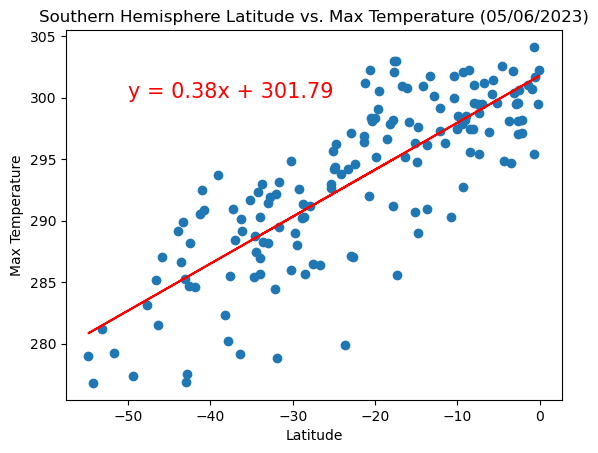

In [47]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Define x and y values
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,300), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (05/06/2023)")
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

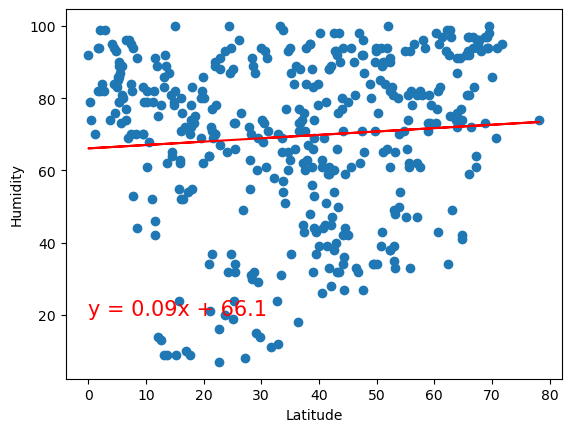

In [50]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Humidity"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

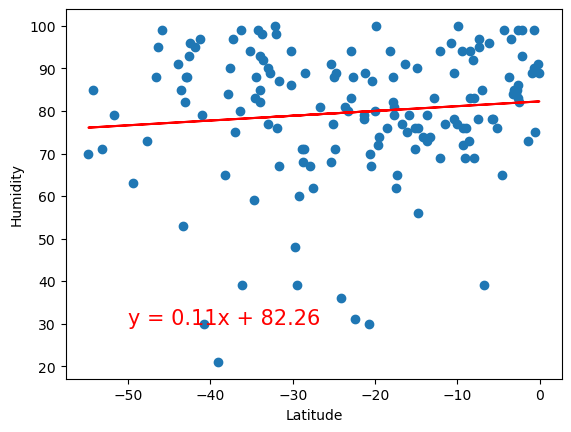

In [49]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Define x and y values
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

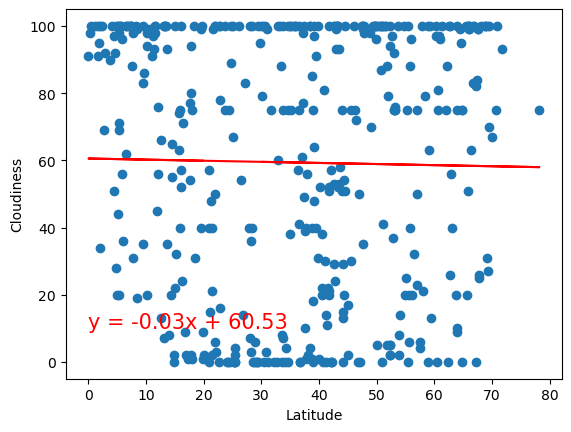

In [48]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Cloudiness"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

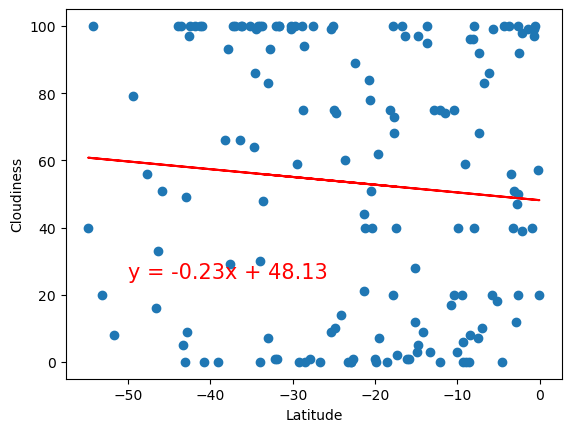

In [51]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Define x and y values
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

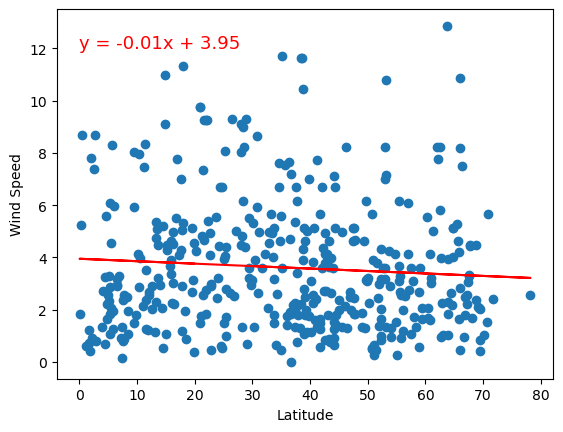

In [56]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Define x and y values
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Wind Speed"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0,12), fontsize=13, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

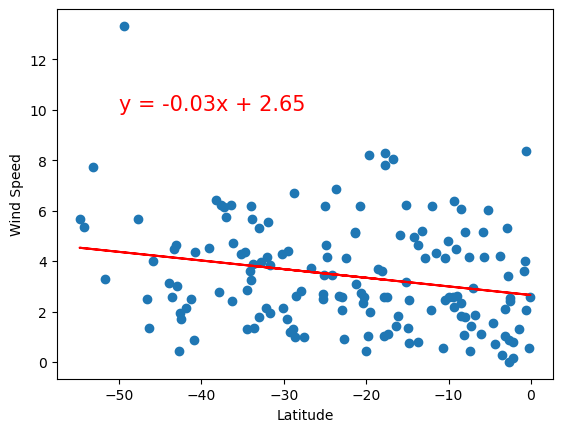

In [59]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Define x and y values
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# Perform linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# Calculate the regression line
regress_values = x * p_slope + p_int

# Create line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE